In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 10
plt.style.use('ggplot')

tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")
exercise = sns.load_dataset("exercise")
from ggplot import diamonds

orders = pd.read_excel('/Users/danielschradick/Documents/Data/SuperstoreSample.xls','Orders')
orders.columns = orders.columns.str.replace(' ', '_')
orders.columns = map(str.lower,orders.columns)

Tutorials: https://seaborn.pydata.org/tutorial.html <br>
API:        https://seaborn.pydata.org/api.html<br>
FacetGrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html<br>

<p>
lmplot: https://seaborn.pydata.org/generated/seaborn.regplot.html <Br>
ColorPalttes: https://seaborn.pydata.org/tutorial/color_palettes.html

#### Wide und long form
Wenn x und y fehlen => interpretiert als wide-form, sonst long-form
<p>
Kann auch die Daten direkt an x und y übergeben - z.B Series barplot    <bR>
Series plotten: sns.barplot(y = profitables.index, x = profitables.values)

## Automatische Gruppen Aggregation
**Idee**: Wenn ein Wert vorhanden, dann Wert (z.B. in Barplot) - sonst wird Statistik + CI von z.B. mean (für die Kategorie) berechnet <p>
 
 => macht groupby(), aggregation und CI berchnen hinter den Kulissen

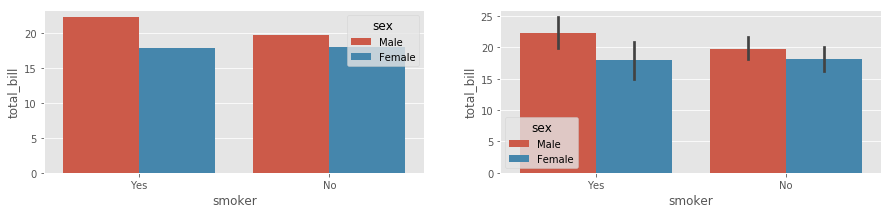

In [2]:
# Selbst aggregieren vs automatisch von Seaborn
self_aggregated = (tips
 .groupby(['sex','smoker'])['total_bill']
 .mean().reset_index())


plt.figure(figsize=(15,3)); plt.sub  plot(121)
sns.barplot(x='smoker',hue='sex',y='total_bill',data=self_aggregated)
# =...
plt.subplot(122)        
sns.barplot(x='smoker',hue='sex',y='total_bill',data=tips)

## Farben

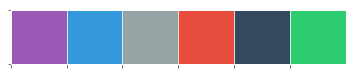

In [3]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
#sns.set_palette(flatui)
sns.set_palette("muted")

## Facetgrid

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


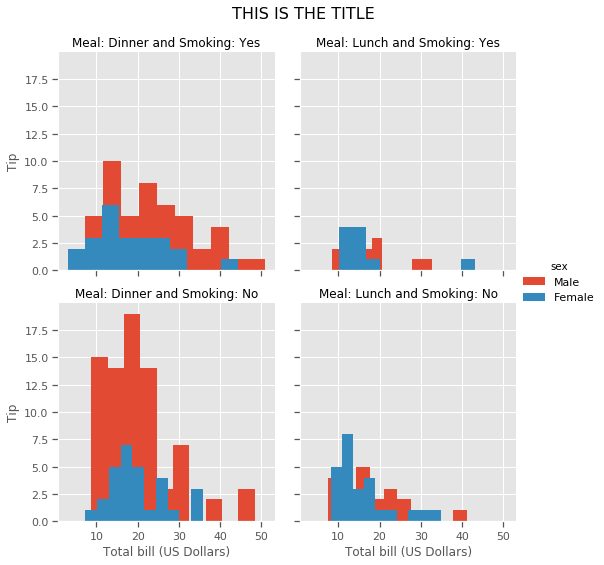

In [21]:
g = sns.FacetGrid(tips.query('total_bill > 0'),            # Datenauswahl 
                  col="time", #col_wrap = 2,               # Spalte + nach wievielen umbrechen
                  row='smoker',                            # Wieviel Elemente in einer Reihe           
                  hue='sex',                               # Farbe
                  height=4, aspect=.9,                     # Größe: aspect * height = width; default: height=3, aspect=1
                  col_order=['Dinner','Lunch']             # Reihenfolge: auf für {row,col,hue}_order                              
                  ) 

(g.map_dataframe(plt.hist, "total_bill")                   # Daten auf auf Funktion anwende 
  .add_legend()                                            # Legende hinzufügen
  .set_titles("Meal: {col_name} and Smoking: {row_name}")  # Titel anstatt (smoker = Yes | time = Lunch)
  .set_axis_labels("Total bill (US Dollars)", "Tip"));     # Achsenbeschriftung auf x and Y


plt.subplots_adjust(top=0.9)                               # Titel => muss unter facet-code stehen
plt.suptitle('THIS IS THE TITLE'.upper(),fontsize=16);

## Catplot
- war vorher factorplot
- kann alle anderen kategorischen plots ersetzen (aber besseres layout - z.b. position der legende)
- kann auch facetting

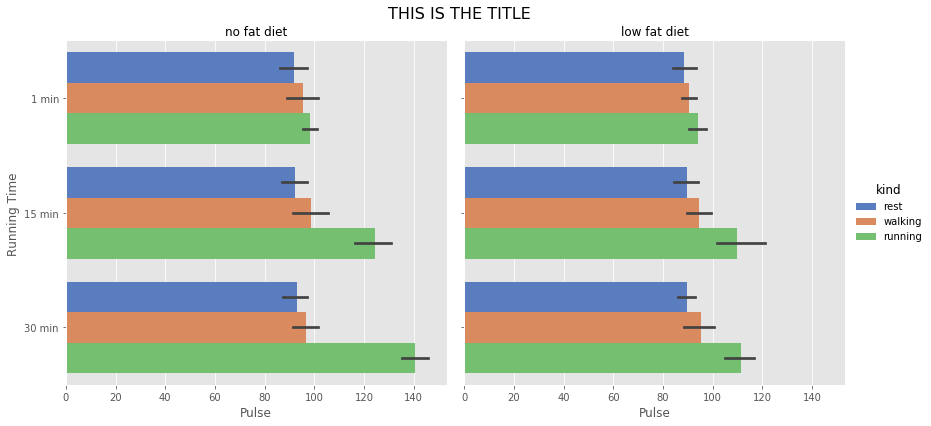

In [6]:
ex = exercise.drop_duplicates(subset=['kind','time'],keep='first')  # Jeweils ein Datenwert => kein CI
ex = exercise                                                       # Mehrere Datenwerte    => CI 
g = sns.catplot(data=ex,                 # .query("x > 0)
                 x="pulse", y="time",    # x und y Achse
                 hue="kind",             # Farb-Kategorie
                 col = 'diet',           # Col und Row 
                 orient="h",
                 #ci=.95,
                 kind = 'bar',           # default = strip (weiter: count, bar, box, point, violin, swarm,..)          
                 height=6, aspect=1,     # Größe: aspect * height = width; default: height=3, aspect=1
                 palette="muted"
               )   

g = (g.set_axis_labels("Pulse", "Running Time")
      .set_titles("{col_name} {col_var}"))
#     .set_xticklabels(["Men", "Women", "Children"])
#     .despine(left=True))  

plt.subplots_adjust(top=0.9)                               # Titel => muss unter facet-code stehen
plt.suptitle('THIS IS THE TITLE'.upper(),fontsize=16);


### Abkürzende kategorische Funktionen
- **Categorial Scatter**: swarm, strip
- **Distribution**: box, violin,boxen
- **Estimation**: point,bar,count
<p>
=> aus jedem einen ausprobieren

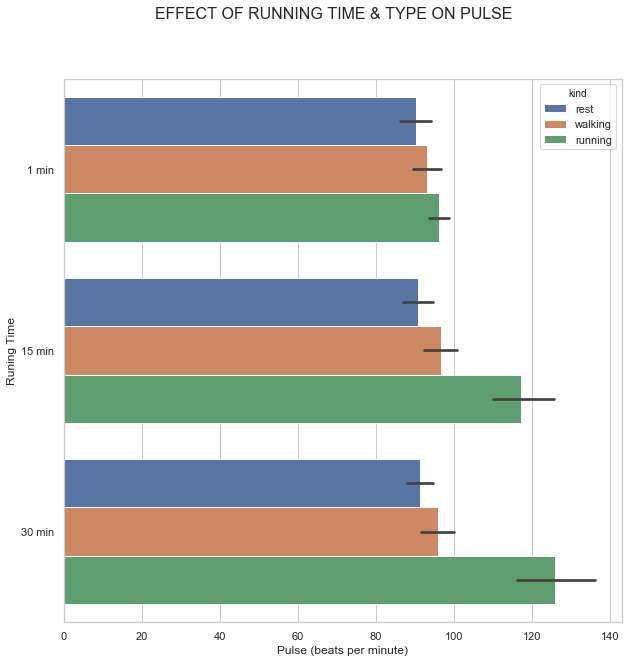

In [101]:
plt.figure(figsize=(10,10))
g = sns.barplot(data=exercise, x="pulse", y="time", hue="kind", orient="h")   
plt.suptitle('Effect of running time & type on Pulse'.upper(),fontsize=16)
plt.xlabel('Pulse (beats per minute)')
plt.ylabel('Runing Time');

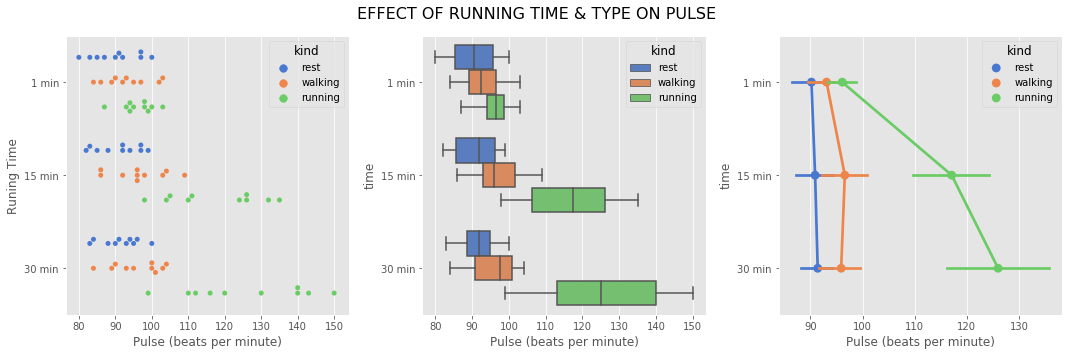

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(131); g = sns.swarmplot(data=exercise, x="pulse", y="time", hue="kind", dodge=True, orient="h"); plt.xlabel('Pulse (beats per minute)')   
plt.ylabel('Runing Time');
plt.subplot(132); g = sns.boxplot(data=exercise, x="pulse", y="time", hue="kind", orient="h"); plt.xlabel('Pulse (beats per minute)')   
plt.subplot(133); g = sns.pointplot(data=exercise, x="pulse", y="time", hue="kind", orient="h"); plt.xlabel('Pulse (beats per minute)')   
plt.tight_layout()

plt.subplots_adjust(top=0.9) 
plt.suptitle('Effect of running time & type on Pulse'.upper(),fontsize=16);

#### catplot vs abkürzung

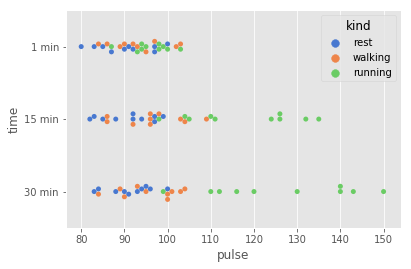

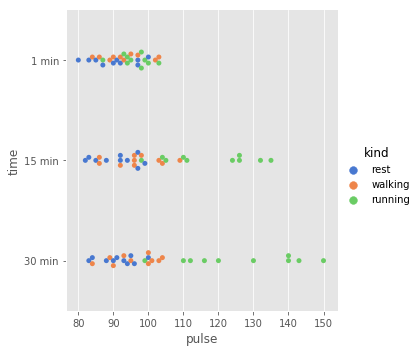

In [9]:
sns.swarmplot(data=exercise, x="pulse", y="time", hue="kind", orient="h")   
sns.catplot(data=exercise, x="pulse", y="time", hue="kind", orient="h", kind = 'swarm')   

## Lineplot

Text(0,0.5,'Signal (unit)')

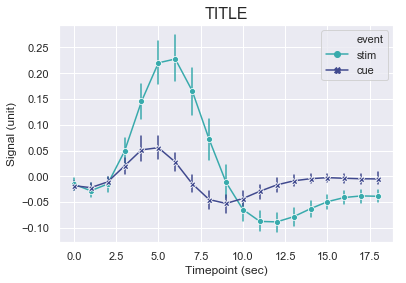

In [71]:
palette = sns.color_palette("mako_r", 2)

ax = sns.lineplot(data=fmri,                         # .query('20170101 < date < 20170201')
                  x="timepoint", y="signal",         # x,y Werte
                  # Verschiedene Kategorien                                
                  hue="event", palette=palette,      # Mehrere Kurven: nach Kategorie                    
                  style="event",                     # Mehrere Styles: z.B. solid, dashed nach Kategorie
                  markers=True, dashes=False,        # Datenpunkte: einzeichnen
                  # Statistik + CI vs Einzelne Cases 
                  err_style="bars", ci=95,# ci='sd'  # Statistik + Konfidenzintervalle (oder Standardabweichung)
                  estimator='mean'                   # Statistik = Funktion von ndarray: sum,min,mean,median,...
                  #units='subject', estimator=None,  # Einzelne Cases betrachten
                  )

plt.title('TITLE'.upper(),fontsize=16)
plt.xlabel('Timepoint (sec)')
plt.ylabel('Signal (unit)')



### Scatterplot

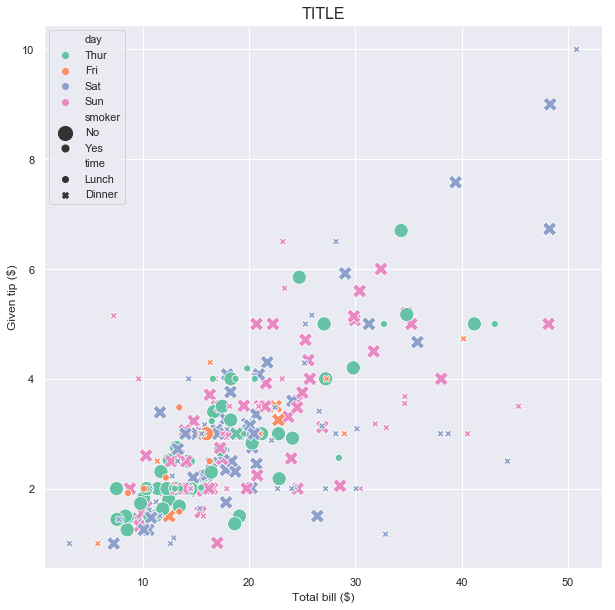

In [75]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x="total_bill", y="tip",        # x,y Achsen
                     hue="day", style='time',        # kategorische features
                     size="smoker",sizes=(50, 200),  # SIZE für binary gut!!!! sizes = von->bis
                     size_order = ['No','Yes'],      # auch hue_order, style_oder,...
                     palette="Set2",
                     data=tips)
plt.title('TITLE'.upper(),fontsize=16)
plt.xlabel('Total bill ($)')
plt.ylabel('Given tip ($)');



## Regression

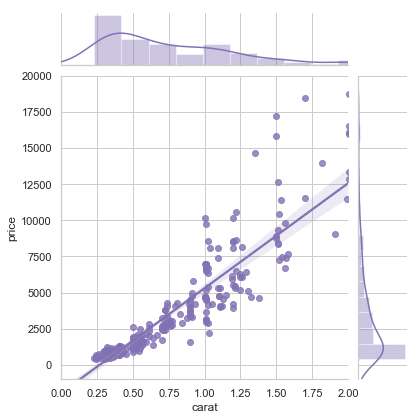

In [99]:
sns.jointplot(data=diamonds.sample(300,random_state=0),
              x='carat', y='price', kind='reg',
              color='m', xlim=(0,2), ylim=(-1000,20000))

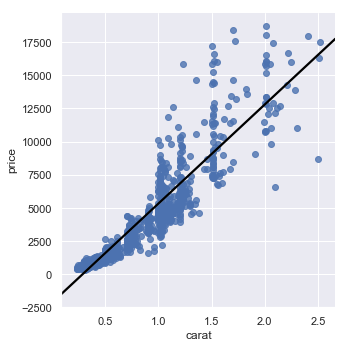

In [76]:
from statsmodels.formula.api import ols
sns.set(color_codes=True)
sns.lmplot(data=diamonds.sample(1000,random_state=0),   # Daten begrenzen
           x='carat',y='price',                         # x, y Achse
           order=1, line_kws={'color': 'black'},        # Polynom + Farbe
           ci=True);        

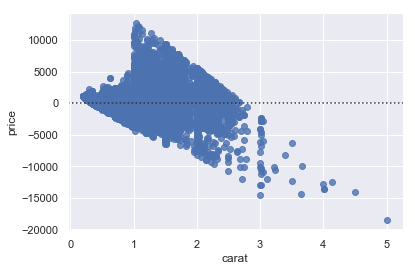

In [77]:
sns.residplot(x="carat", y="price", data=diamonds);

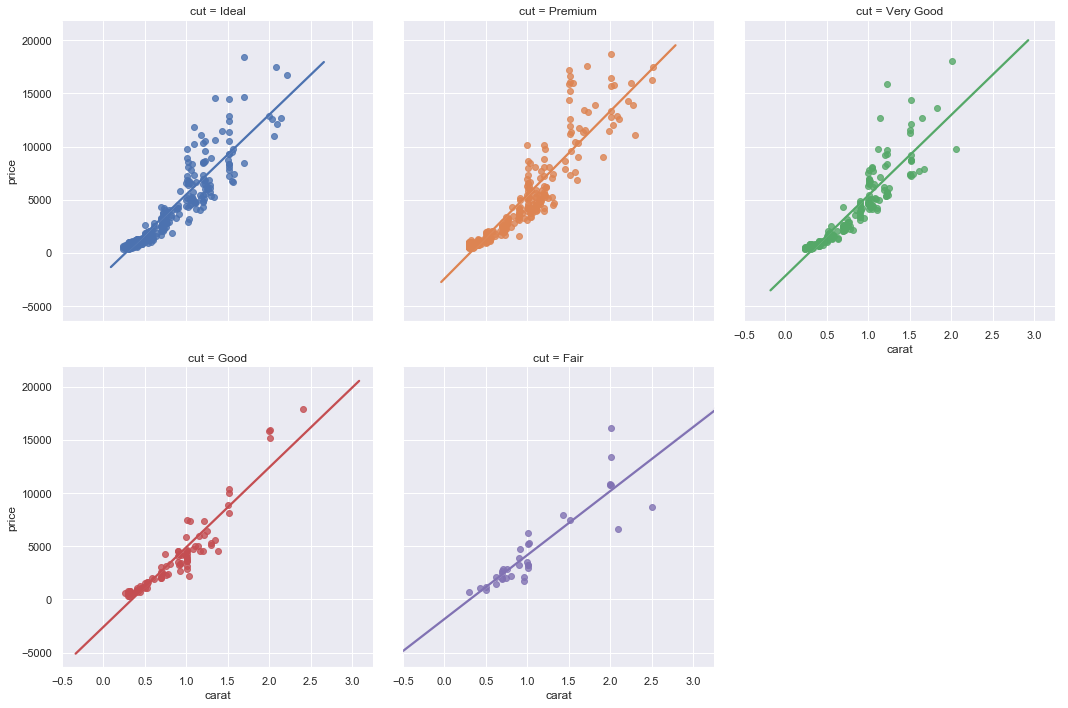

In [49]:
sns.lmplot(data=diamonds.sample(1000,random_state=0),   # Daten begrenzen
           x='carat',y='price',                         # x, y Achse
           col='cut', col_wrap=3, hue='cut',            # Facetting
           ci=True)        

In [50]:
from statsmodels.formula.api import ols
model = ols("price ~ carat + cut", diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:30:50   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3875.4697     40.408    -95.908      0.000   -3954.670   -3796.269
cut[T.Good]       1120.3319     43.499     25.755      0.000    1035.073    1205.591
cut[T.Ideal]      1800.9240     39.344     45.773      0.000    1723.809    1878.039
cut[T.Premium]    1439.0771     39.865     36.098      0.000    1360.941    1517.214
cut[T.Very Good]  1510.1354     40.240     37.528      0.000    1431.265    1589.006
carat             7871.0821     13.980    563.040      0.000    7843.682    7898.482
==============================================================================
Omnibus:                    14616.138   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150962.278
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.944   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""